<a href="https://colab.research.google.com/github/Milica775/Leaf-Classification/blob/main/Leaf_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Uvod**


Klasifikacija je zadatak nadgledanog učenja čiji je cilj predvideti  klasne oznake novih instanci na osnovu ranijih opažanja.

Glavni cilj nadgledanog učenja je da obučimo model iz označenih trening podataka koji omogućavaju da izvršimo predviđanje o neviđenim ili budućim podacima.
Ovde se termin „nadgledani“ odnosi na skup trening primera (ulaznih podataka)
gde su signali željenog izlaza (oznake) već poznati.


Primjer klasifikacije sa kojim se susrećemo u svakodnevnom životu jeste sistem elektronske pošte koji ima mogućnost automatskog otkrivanja neželjenih poruka. To znači da sistem analizira sve dolazne poruke i označava ih kao spam ili ne-spam, čak i mi,  kao krajnji korisnici, imamo mogućnost da ručno označavamo poruke kao neželjene, kako bismo poboljšali sposobnost otkrivanja spam-a.

Ovaj primjer klasifikacije spada u binarnu klasifikaciju jer postoje samo dvije klase 'spam' i 'nije spam', a pored nje imamo jos tri vrste klasfikacije:
'Multi-Class' kada postoje više od dvije klase, 'Multi-Label' kada jedan objekat pripada jednoj ili više klasa i 'Unbalanced' kada je broj primjera u svakoj klasi nejednako raspoređen. 

Klasifikacija fotografija predstavlja dodjeljivanje najvjerovatnije kategorije kojoj pripada fotogafija iz nekog skupa fiksnih kategorija.

Postoje dva tipa klasifikatora fotografija:

*  prvi tip je klasfikacija pomoću karakteristika fotografija
*  drugi tip je kada se duboka neuronska mreža obučava za klasifikovanje

Klasifikacija fotografija sastoji se od dvije faze:

*   treniranje-algoritmu za klasifikaciju se pružaju ulazi za koje je poznata oznaka klase i koristeći te ulaze on obučava model
*   testiranje-kada je završen trening, naučeni model se koristi za predviđanje klasa novih, do tada neviđenih ulaza

#**Objašnjenje zadataka**

Osnovna ideja zadatka jeste da na osnovu binarnih fotografija lišća i datih karakteristika kao što su oblik, obod i tekstura kreira se model koji će da ih klasifikuje u 99 različitih biljnih vrsta.

Set podataka se sastoji od 1584 fotografije listova koje su pretvorene u fotografije sa bijelom pozadinom i crnim listovima.

Zadatak sadrži četiri fajla:

*   images.zip- u ovom zip fajlu se nalaze 1584 fotografije listova
*   sample_submission.csv- primjer kako treba da izleda sadržaj fajl koji će se dobiti kao rješenje zadatka
*   train.csv- skup podataka za trening
*   test.csv- skup podataka za testiranje

Fajlovi train.csv i test.csv sadrže sljedeće kolone:

*   id- jedinstvena oznaka za svaku fotografiju
*   margin_1, margin_2, margin_3, ..., margin_64 - 64 vektora atributa koji predstavlja karakteristike ivica
*   shape_1, shape_2, shape_3, ..., shape_64 - 64 vektora atributa koji predstavlja karakteristike oblika
*  texture_1, texture_2, texture_3, ..., texture_64 - 64 vektora atributa koji predstavlja karakteristike teksture


#**Objašnjenje algoritma za realizaciju zadatka**


Za realizaciju zadatka korišten je jedan od najpoznatijih algortama današnjice, a to je: XGBoost.

Ovi algoritmi se zasnivaju na stablima odlučivanja, pa je za početak potrebno objasniti značenje ovih stabala. Kao što možemo vidjeti na slici u nastavku stabla odlučivanja se sastoje od čvorova u kojima se nalaze određeni uslovi i listova u kojima se nalaze odgovarajuće vrijednosti. Ako je uslov u korijenu stabla ispunjen, odnosno vrijednost A je veća od 2 izvršavanje se nastavlja na lijevoj strani stabla, a  ako nije izvršavanje se nastavlja na desnu stranu. Jednom kada dođemo do lista dobijamo odgovarajuće predviđanje za tu vrijednost.


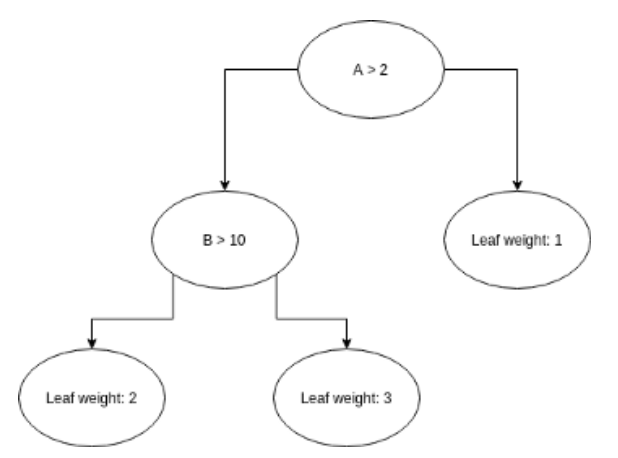

Iako su se stabla odlučivanja koristila u brojnim aplikacijama, ova stabla vremenom nisu mogla da se nose sa složenošću koja se sreće u realnim podacima i tako stabla odlučivanja postaju slabiji modeli.
Kako bi se prevazišao ovaj problem, pojavila se ideja da se kombinuju višestruki slabi modeli kako bi se dobio jak model. 
Za kombinovanje slabijih modela postoje različite strategije, a XGBoost koristi pristup gdje svaki novi model pokušava da nadokandi greške prethodnog. 


Najlakše razumijevanje ovog algoritma je na primjeru koji je prikazan u nastavku.
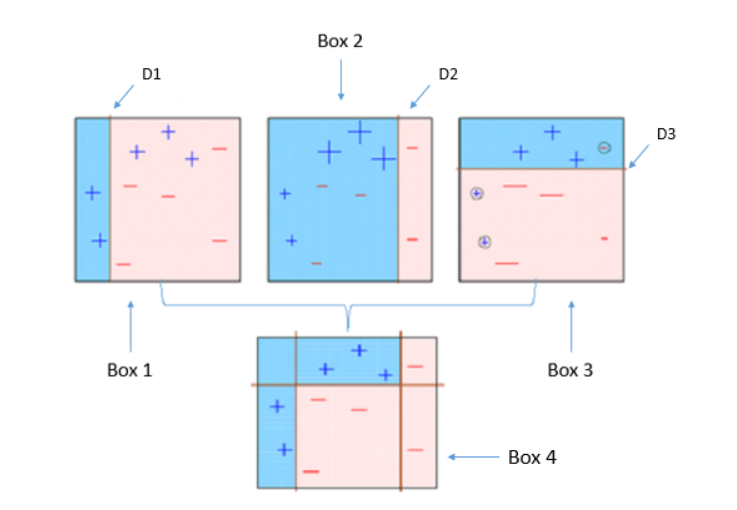





Na fotografiji su prikazana četiri različita klasfikatora koja pokušavaju da klasfikuju znakove '+' i '-' što je bolje moguće.

Box 1:

Postavlja vertikalnu liniju u D1 i određuje da sve što je lijevo od te linije je +, a sve što je desno je -. I kao što se vidi na fotografiji pogrešno je klasfikovao tri znaka +.

Box 2:

Postavlja vertikalnu liniju u D2 i sve što je desno od nje postavlja kao -, a lijevo kao + i pri tom pogrešno klasfikuje tri znaka -.

Box 3:

Postavlja horizontalnu liniju u D3 i pritom loše klasfikuje zaokružene znakove.

Box 4:

Kombinacija prethodna tri slabija klasfikatora i dobijanje rješenja u kom su svi klasifkovani ispravno.

Poslijednje rješenje ustvari reprezentuje osnovu ideju ovog algoritma, a to je da se prvo kreira slabiji model, potom se izvode zaključci na osnovu tog modela i na osnovu tih zaključaka prave se novi, jači modeli.






#**Realizacija zadatka**

 Na samom početku, imporotvane su dvije biblioteke koje će biti neophodne za nastavak projekta:



*   NumPy (Numerical Python) je Pajtonova biblioteka otvorenog koda koja 
predstavlja univerzalni standard za rad sa numeričkim podacima u Pajtonu. Biblioteka sadrži višedimenzionalne nizove podataka i matrice i omogućava izvođenje matematičkih operacija nad njima. NumPy garantuje efikasne proračune i isporučuje ogromnu biblioteku matematičkih funkcija na visokom nivou.
*   
Pandas je biblioteka napisana za Pajton kako bi omogućila manipulaciju podacima i analizu istih. Pandas omogućava importovanje podataka u različitim formatima kao što su CSV, JSON, SQL, Excel. Takođe, omogućava i različite manipulacije podacima kao što su spajanje, selektovanje, promijena oblika, čišćenje podataka.











Sljedeći korak jeste povezivanje Google Colab-a sa Google Drive-om kako bi se omogućili importovanje fajlova koji su dobijeni u sklopu projektnog zadatka.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dobijeni fajlovi su zapakovani pa je neophodno izvršiti njihovo raspakivanje korištenjem komande u nastavku.

In [ ]:
!unzip /content/drive/MyDrive/#4.zip

Archive:  /content/drive/MyDrive/#4.zip
  inflating: images.zip              
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: train.csv.zip           


Nakon što je Google Colab povezan sa Google Drive-om, vrši se importovanje podataka koji se nalaze u fajlu 'train.csv' koristeći biblioteku Pandas čiji opis se nalazi na samom početku.
Importovanje podataka se realizuje korišćenjem komande 'read_csv' iz prethodno pomenute biblioteke. Takođe, u sklopu te komande postavlja se kolona 'id' kao indeksna kolona.

Nakon toga vrši se prikaz tabele, pozivanjem njenog naziva.

In [ ]:
train_dir = '/content/train.csv.zip'
train_data = pd.read_csv(train_dir,index_col='id')
train_data


,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.000000,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.000000,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,0.037109,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.000000,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.000000,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.000000,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.000000,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,0.033203,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.062500,0.000000,0.038086,0.000000,0.019531,0.000000,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.000000,0.000000,0.053711,0.036133,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.000000,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.000000,0.015625,0.000000,0.009766,0.001953,0.009766,0.009766,0.015625,0.005859,0.000000,0.017578,0.007812,0.005859,0.009766,0.019531,0.042969,0.021484,...,0.000977,0.000000,0.000977,0.003906,0.035156,0.015625,0.027344,0.000000,0.000000,0.008789,0.015625,0.000000,0.000000,0.011719,0.000977,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.000000,0.000000,0.000977,0.000000,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,0.001953,0.019531,0.001953,0.003906,0.035156,0.000000,0.005859,0.000000,0.001953,0.003906,0.039062,0.009766,0.000000,0.009766,0.005859,0.027344,0.001953,0.017578,0.003906,0.021484,0.027344,0.027344,0.000000,0.003906,0.011719,0.003906,0.005859,0.044922,0.056641,...,0.005859,0.019531,0.124020,0.000000,0.017578,0.000977,0.016602,0.009766,0.006836,0.000977,0.005859,0.000000,0.000977,0.001953,0.096680,0.016602,0.126950,0.000000,0.036133,0.055664,0.000000,0.001953,0.027344,0.000000,0.006836,0.017578,0.004883,0.000000,0.006836,0.022461,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,0.001953,0.044922,0.041016,0.011719,0.041016,0.000000,0.009766,0.015625,0.011719,0.007812,0.021484,0.000000,0.000000,0.000000,0.015625,0

Sklearn (poznata kao i scikit-learn) je jedna od najmoćnijih bibilioteka mašinskog učenja u Pajtonu. Posjeduje set modela i alata spremnih za treniranje-od predprocesiranja podataka pa do obuke modela i procijene performansi. 

U zadatku, kategorije su predstavljene tekstualno, odnosno sa ne-numeričkim vrijednostima, međutim u mašinskom učenju algortimi mnogo bolje rade sa numeričkim vrijednostima pa je zato u nastavku koristeći 'LabelEncoder' iz Sklearn biblioteke izvršeno pretvaranje kategorija u vrijednosti numeričkog tipa kako bi se olakšao dalji rad.

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = train_data['species']
le = LabelEncoder().fit(y)
labels = le.transform(y) 
classes = list(le.classes_) 
print(classes)


['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

Sljedeći korak jeste da se isječe kolona 'species', koristeći funkciju 'drop()' koja sadrži tri argumenta

*   columns-kolona koju brišemo
*   axis-oznaka da se briše kolona
*   inplace-izvrši operaciju bez povratne vrijednosti

In [ ]:
train_data.drop(columns='species',axis=1,inplace=True)
X = train_data
X

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.000000,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.000000,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,0.037109,0.019531,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.000000,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.000000,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
2,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.000000,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.000000,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,0.033203,0.019531,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.062500,0.000000,0.038086,0.000000,0.019531,0.000000,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.000000,0.000000,0.053711,0.036133,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
3,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.000000,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.000000,0.015625,0.000000,0.009766,0.001953,0.009766,0.009766,0.015625,0.005859,0.000000,0.017578,0.007812,0.005859,0.009766,0.019531,0.042969,0.021484,0.001953,...,0.000977,0.000000,0.000977,0.003906,0.035156,0.015625,0.027344,0.000000,0.000000,0.008789,0.015625,0.000000,0.000000,0.011719,0.000977,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.000000,0.000000,0.000977,0.000000,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
5,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,0.001953,0.019531,0.001953,0.003906,0.035156,0.000000,0.005859,0.000000,0.001953,0.003906,0.039062,0.009766,0.000000,0.009766,0.005859,0.027344,0.001953,0.017578,0.003906,0.021484,0.027344,0.027344,0.000000,0.003906,0.011719,0.003906,0.005859,0.044922,0.056641,0.027344,...,0.005859,0.019531,0.124020,0.000000,0.017578,0.000977,0.016602,0.009766,0.006836,0.000977,0.005859,0.000000,0.000977,0.001953,0.096680,0.016602,0.126950,0.000000,0.036133,0.055664,0.000000,0.001953,0.027344,0.000000,0.006836,0.017578,0.004883,0.000000,0.006836,0.022461,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
6,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,0.001953,0.044922,0.041016,0.011719,0.041016,0.000000,0.009766,0.015625,0.011719,0.007812,0.021484,0.000000,0.000000,0.000000,0.015625,0.009766,0.001953,0.017578,0.041016,0.005859,0.021484,

Kao što sam več pomenula, ovaj algoritam podrazumijeva stvaranje i dodavanje stabala odlučivanja uzastopno pri čemu svaki pokušava ispraviti greške od prethodnog pa se postavlja pitanje koliko stabala treba konfigurisati i koliko svako od tih stabala treba da ima nivoa. 

Broj stabala za klasu 'XGBClassifier' je definisan parametrom 'n_estimators'.

Kao što je već napomenuto, ovaj alogoritam se zasniva na tome da se stalno kreiraju nova stabla koja ispravljaju greške prethodnih pa može doći do tkz.'overfitting-a' što znači da je model naučio detalje i da je dobro istrenirao trening podatke ali to može imati za posljedicu da lošije trenira nove podatke, međutim i  mali broj stabala može da dovede do toga da model nije dovoljno obučen.  Upravo iz tih razloga značajan parametar ovog algoritma jeste 'learning_rate' jer on određuje koliko model brzo uči. Manja vrijednost 'learning_rate' će zahtjevati više stabala, što znači i više vremena potrebnog za trening.


Još jedan parameter je 'max_depth' kojim se definiše broj nivoa, odnosno dubina stabla. 






In [ ]:
parameters = parameters = {
    'n_estimators': list(range(200,401,100)),
    'learning_rate':[l/1000 for l in range (5,15,10)],
    'max_depth': list(range(6,20,5)) 
}           
parameters

{'learning_rate': [0.005],
 'max_depth': [6, 11, 16],
 'n_estimators': [200, 300, 400]}



*   
sklearn.metrics - predstavlja modul koji sadrži skup jednostavnih funkcija koje služe za mjerenje greške predviđanja.
*   XGBClassifier- implementacija scikit-learn API za XGBoost klasifikaciju.





In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import log_loss ,accuracy_score
from matplotlib import pyplot


GridSearchCV(GridSearch with Cross-Validation) predstavlja pretragu najboljih parametara za određeni skup podataka ili za model.Ovo je jako važno jer performanse modela zavise od njegovih parametara.Ne postoji način da unaprijed odredimo najbolje parametre pa je najbolje da se isproba kombinacija svih mogućih, međutim kada bi to radili ručno oduzelo bi previše vremena i resursa pa se zato koristi GridSearchCV za automatizaciju pronalaska najoptimalnijih parametara.


*   estimator-instanca modela za koju želimo da provjerimo parametre.
*   param_grid-parametri koje želimo da testiramo
*   n_jobs- broj procesa koji želimo paralelno pokretati za ovaj zadatak
*   verbose-određuje detaljnost prikazivanja poruke kao rezultata izvršavanja
*   scoring-'neg_log_loss'-je funkcija iz modula sklearn metrics koja služi za mjerenje greške predviđanja, što je manja povratna vrijednost ove funkcije to je bolje, odnosno manja je greška predviđanja







In [ ]:
gsearch = GridSearchCV(estimator=XGBClassifier(),
                       param_grid = parameters, 
                       scoring= 'neg_log_loss',
                       n_jobs=4,cv=5, verbose=7)

In [ ]:
gsearch

print(gsearch)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'learning_rate': [0.005], 'max_depth': [6, 11, 16],
                         'n_estimators': [200, 300, 400]},
             pre_dispatch='2*n_jobs', refit=

Sljedeći korak jeste treniranje modela kako bi kao rezultat dobili najoptimalnije parametre.

In [ ]:
gsearch.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 44.2min
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed: 83.2min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed: 83.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'learning_rate': [0.005], 'max_depth': [6, 11, 16],
                         'n_estimators': [200, 300, 400]},
             pre_dispatch='2*n_jobs', refit=

Nakon što smo istrenirali model za pronalazak najboljih parametara, izdvajamo te parametre.

In [ ]:
best_n_estimators = gsearch.best_params_.get('n_estimators')
best_n_estimators


400

In [ ]:
best_learning_rate = gsearch.best_params_.get('learning_rate')
best_learning_rate

0.005

In [ ]:
best_max_depth = gsearch.best_params_.get('max_depth')
best_max_depth

6

Sljedeći korak jeste kreiranje finalnog modela i prosljećivanje tom modelu najbolje parametre koje smo dobili u prethodnom koraku.

Metode fit() i predict() su iz scikit-learn biblioteke, a objekat koji implementira ove metode jeste 'Estimator'. Estimator je objekat koji se ponaša kao klasifikator ili regresor, odnosno izvršava specificne kalkulacije koje odgovaraju novim, još neviđenim podacima.
Fit() je metoda koja ima dva argumenta:


*   X-predstavlja numeričke podatke iz tabele na osnovu kojih se vrši klasifikacija
*   y-predstavlja klase za klasifikovanje

Fit metoda obavlja brojne operacije, prvo briše sve atribute koju su uskladišteni u 'estimatoru', zatim vrši provjeru parametara i validaciju podataka i na kraju vrši se treniranje modela.




In [ ]:
eval_set = [(X, y)]

final_model = XGBClassifier(n_estimators=best_n_estimators,
                            learning_rate=best_learning_rate,
                            max_depth=best_max_depth)

train=final_model.fit(X,y, eval_metric=["merror", "mlogloss"],eval_set=eval_set,verbose=True)

[0]	validation_0-merror:0.738384	validation_0-mlogloss:4.57356
[1]	validation_0-merror:0.679798	validation_0-mlogloss:4.55187
[2]	validation_0-merror:0.621212	validation_0-mlogloss:4.53012
[3]	validation_0-merror:0.610101	validation_0-mlogloss:4.50841
[4]	validation_0-merror:0.585859	validation_0-mlogloss:4.48682
[5]	validation_0-merror:0.585859	validation_0-mlogloss:4.46553
[6]	validation_0-merror:0.577778	validation_0-mlogloss:4.44424
[7]	validation_0-merror:0.568687	validation_0-mlogloss:4.42293
[8]	validation_0-merror:0.563636	validation_0-mlogloss:4.40181
[9]	validation_0-merror:0.547475	validation_0-mlogloss:4.38059
[10]	validation_0-merror:0.551515	validation_0-mlogloss:4.35956
[11]	validation_0-merror:0.540404	validation_0-mlogloss:4.33831
[12]	validation_0-merror:0.538384	validation_0-mlogloss:4.31726
[13]	validation_0-merror:0.540404	validation_0-mlogloss:4.29627
[14]	validation_0-merror:0.536364	validation_0-mlogloss:4.27535
[15]	validation_0-merror:0.527273	validation_0-mlo

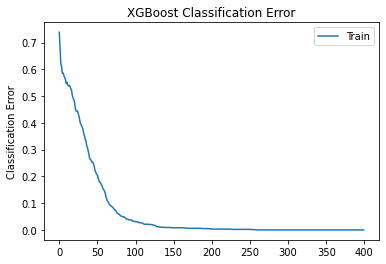

In [ ]:
# retrieve performance metrics
results = final_model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
#ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

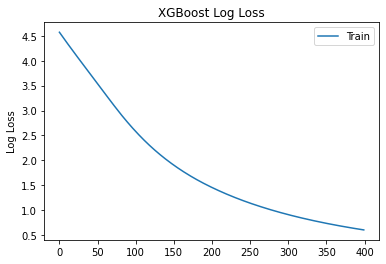

In [ ]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

Nakon što je model istreniran sljedeći korak jeste da se izvrši predviđanje na test skupu podataka. Da bismo to izvršili poziva se funkcija predict_proba() koja koristi naučene parametre fit() metode kako bi predvidjela nove, do sada neviđene test podatke.

In [ ]:
test_data = pd.read_csv('/content/test.csv.zip')
test_index = test_data.id 
test_data.drop('id',axis=1,inplace=True)
pred_test = final_model.predict_proba(test_data)
pred_test


array([[0.00872758, 0.00870935, 0.00873068, ..., 0.00875932, 0.00925316,
        0.0087665 ],
       [0.00384367, 0.00383564, 0.01773704, ..., 0.00385765, 0.00383308,
        0.00384687],
       [0.00635229, 0.26093027, 0.00628517, ..., 0.00630579, 0.00626563,
        0.00986398],
       ...,
       [0.00448846, 0.0075374 , 0.00449005, ..., 0.00450478, 0.00447609,
        0.00449219],
       [0.0092595 , 0.00940887, 0.01072905, ..., 0.00929317, 0.00923399,
        0.00926721],
       [0.0036178 , 0.00689475, 0.00361909, ..., 0.00363096, 0.00360783,
        0.00362082]], dtype=float32)

'DataFrame' je  dvodimenzionalna struktura podataka koja omogućava smještanje prethodno dobijenih podataka u kolone, dok se u zaglavlju kolona nalaze klase za koje se vršila klasifikacija.

In [ ]:
submission = pd.DataFrame(pred_test, columns=classes)
submission.insert(0, 'id', test_index)
submission.to_csv('submission.csv', index=False)

#**Zaključak**

Kao što sam napomenula u samom uvodu ovo XGBoost je jedan od najpopularnijih algoritama današnjice, a razlozi za to su brojni:

*   brzina i performanse: izvorno je napisan u C++, relativno je brži od ostalih klasifikatora i sa boljim performansama
*   paralelizam: može da koristi snagu računara sa više jezgara, što omogućava obučavanje na velikim skupovima podataka
*   širok izbor različitih parametara: parametri za unakrsnu validaciju, regularizaciju, nedostajuće vrijednosti, parametri stabla..







#**Reference**

1.https://www.datacamp.com/community/tutorials/xgboost-in-python

2.https://www.kdnuggets.com/2021/05/xgboost-explained-diy-xgboost-library-200-lines-python.html